In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f"{x:.3f}")

In [45]:
try:
    df = pd.read_csv("googleplaystore.csv")

    print(df.head())

    df.info()

    print(df.describe())

    print(df.describe(include='object'))

except FileNotFoundError:
    print("ERR: File not found. Please check the file path.")
except Exception as e:
    print(f"ERR: An error occurred: {e}")

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN   4.100   
1                                Coloring book moana  ART_AND_DESIGN   3.900   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN   4.700   
3                              Sketch - Draw & Paint  ART_AND_DESIGN   4.500   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN   4.300   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [46]:
# --- Part 2 ---


print("--- Corrupted Rows Detection and Cleaning ---")
# Let's investigate why the 'Reviews' column is an 'object'.
# Let's work with values ​​that can't be converted to numbers with pd.to_numeric.
# error='coerce' converts values ​​to numbers and makes them 'NaN' (Not a Number).
# Here, we're looking for values ​​that are not NaN but also not digital (object).
# However, the clearest indicator is a strange value like '3.0M' in the 'Reviews' column.
# Or a value of 'Free' in the 'Installs' column (because that row should have 'Type' but it became 'Installs').
# We can most clearly spot the broken line (usually line 10472) by looking at the 'Free' value in the 'Installs' column.
problem_row = df[df['Installs'] == 'Free']
print(problem_row)

# Let's delete this line (or lines) using the index number
if not problem_row.empty:
    df = df.drop(problem_row.index)
else:
    print("No corrupted rows found based on 'Installs' column.")
# Since we deleted the corrupted row, the 'Reviews' column should now be clean.
# We just need to change its type to 'int'.
print("\n'Reviews' column is being converted to 'int' type...")
df['Reviews'] = pd.to_numeric(df['Reviews'])
print(f"'Reviews' column's new data type: {df['Reviews'].dtype}")

--- Corrupted Rows Detection and Cleaning ---
                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9  19.000    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN  

'Reviews' column is being converted to 'int' type...
'Reviews' column's new data type: int64


In [47]:
print("\n--- Step 2.2: Cleaning 'Installs' Column ---")
print(f"Unique 'Installs' values before cleaning (first 5): {df['Installs'].unique()[:5]}")

# 1. Remove ',' (comma) character
# The .str method allows us to perform string operations on pandas series
df['Installs'] = df['Installs'].str.replace(',', '', regex=False)

# 2. Remove '+' (plus) character
df['Installs'] = df['Installs'].str.replace('+', '', regex=False)

# 3. Convert column to numeric (integer) type
df['Installs'] = pd.to_numeric(df['Installs'])

print(f"\nCleaned 'Installs' column's data type: {df['Installs'].dtype}")
print(f"Cleaned 'Installs' values (first 5 unique): {df['Installs'].unique()[:5]}")

print("\n--- Final DataFrame Info After Cleaning ---")
df.info()


--- Step 2.2: Cleaning 'Installs' Column ---
Unique 'Installs' values before cleaning (first 5): ['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+']

Cleaned 'Installs' column's data type: int64
Cleaned 'Installs' values (first 5 unique): [   10000   500000  5000000 50000000   100000]

--- Final DataFrame Info After Cleaning ---
<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updat

In [48]:

print(f"Unique 'Price' values before cleaning (first 5): {df['Price'].unique()[:5]}")

# 1. Remove '$' (dollar) character
# The .str method allows us to perform text operations on the pandas series.
# Using regex=False prevents the '$' character from being recognized as a special regex character and indicates that it is a simple text replacement.
df['Price'] = df['Price'].str.replace('$', '', regex=False)

# 2. Convert column to numeric (float) type
df['Price'] = pd.to_numeric(df['Price'])

print(f"\n After cleaning: {df['Price'].dtype}")
print(f"After cleaning 'Price' values (first 5 unique): {df['Price'].unique()[:5]}")

print("\n--- Final DataFrame Info After Cleaning ---")
df.info()

Unique 'Price' values before cleaning (first 5): ['0' '$4.99' '$3.99' '$6.99' '$1.49']

 After cleaning: float64
After cleaning 'Price' values (first 5 unique): [0.   4.99 3.99 6.99 1.49]

--- Final DataFrame Info After Cleaning ---
<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-nu

In [49]:
print("\n--- Step 2.4: Duplicate Data Analysis ---")
print(f"   Before: {len(df)}")

# --- Duplicate Data Analysis ---
full_row_duplicates = df.duplicated().sum()
print(f"   Full-row duplicates: {full_row_duplicates}")

app_name_duplicates = df['App'].duplicated().sum()
print(f"   App duplicates: {app_name_duplicates}")


#--- Duplicate Data Cleaning ---
if full_row_duplicates > 0:
    df = df.drop_duplicates()
else:
    print("\nNo full-row duplicates found.")

# 2. Now let's remove duplicates based on 'App'.
# Strategy: Sort by the 'Reviews' column from largest to smallest,
# and then keep the 'first' record ('keep='first') while removing duplicates based on the 'App' column.
# This 'first' record will be the record with the highest 'Reviews' thanks to the sorting.

if app_name_duplicates > 0:
    # as a first step, sort the DataFrame by 'Reviews' in descending order
    df = df.sort_values(by='Reviews', ascending=False)

    # Remove duplicates based on 'App' column, keep the 'first' one (with the highest 'Reviews')
    df = df.drop_duplicates(subset=['App'], keep='first')
    # Reset the index after dropping rows
    df = df.reset_index(drop=True)

    print(f" After: {len(df)}")
else:
    print("\nNo 'App' based duplicates found.")

print(f"Duplicate rows (final check): {df.duplicated().sum()}")
print(f"'App' based duplicate rows (final check): {df['App'].duplicated().sum()}")

df.info()


--- Step 2.4: Duplicate Data Analysis ---
   Before: 10840
   Full-row duplicates: 483
   App duplicates: 1181
 After: 9659
Duplicate rows (final check): 0
'App' based duplicate rows (final check): 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2

In [50]:
print(f"Before: {df['Size'].unique()[:5]}")


def convert_size_to_bytes(size_str):
    """
        Converts application size text (e.g., '19M', '582k', 'Varies with device')
        to a numeric value in bytes.
    """
    if isinstance(size_str, (int, float)):
        return size_str

    size_str = str(size_str).strip() # for safety, trim whitespace

    if size_str == 'Varies with device':
        # Mark as missing data (NaN - Not a Number)
        return np.nan

    # 'M' (Megabyte) operations
    if size_str.endswith('M'):
        # Remove 'M', convert the remaining part to a number (float), and multiply by 1 Million
        return float(size_str[:-1]) * 1_000_000

    # 'k' (Kilobyte) operations
    if size_str.endswith('k'):
        # Remove 'k', convert the remaining part to a number (float), and multiply by 1 Thousand
        return float(size_str[:-1]) * 1_000

    # If neither 'M' nor 'k' is present, it's likely already in bytes (or an error)
    # Let's try to convert safely with pd.to_numeric
    # If errors='coerce' cannot convert, it will convert to NaN (this is also a security measure)
    return pd.to_numeric(size_str, errors='coerce')

# Apply the function to the entire 'Size' column using .apply()
df['Size'] = df['Size'].apply(convert_size_to_bytes)

# It's also a good practice to rename the column to clarify its unit.
df.rename(columns={'Size': 'Size_in_Bytes'}, inplace=True)

print(f"\n After: {df['Size_in_Bytes'].dtype}")

print(df['Size_in_Bytes'].head())

df.info()

Before: ['Varies with device' '98M' '76M' '97M' '74M']

 After: float64
0            NaN
1            NaN
2            NaN
3            NaN
4   98000000.000
Name: Size_in_Bytes, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size_in_Bytes   8431 non-null   float64
 5   Installs        9659 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(3), int64

In [51]:
# 1. Let's look at the number of unique values ​​(cardinality) of columns of type 'object'
object_cols = df.select_dtypes(include='object')
print(object_cols.nunique())

# --- Strategy and Implementation ---
# According to 'nunique()' output:
# - 'App': ~9659 (Very High Cardinality) -> Do not touch.
# - 'Category': ~33 (Low/Medium) -> set to 'category'.
# - 'Type': ~2 (Very Low) -> set to 'category'.
# - 'Content Rating': ~6 (Very Low) -> set to 'category'.
# - 'Genres': ~115 (Medium) -> set to 'category'.
# - 'Last Updated': ~1377 (High) -> This should actually be 'datetime',
# but it can remain 'object' for now or be converted to 'datetime'.
# Not suitable for 'category'.
# - 'Current Ver': ~2638 (High) -> Touch.
# - 'Android Ver': ~31 (Low/Medium) -> Set 'category'.
 
cols_to_convert = ['Category', 'Type', 'Content Rating', 'Genres', 'Android Ver']

for col in cols_to_convert:
    df[col] = df[col].astype('category')

df.info()

App               9659
Category            33
Type                 2
Content Rating       6
Genres             118
Last Updated      1377
Current Ver       2819
Android Ver         33
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   App             9659 non-null   object  
 1   Category        9659 non-null   category
 2   Rating          8196 non-null   float64 
 3   Reviews         9659 non-null   int64   
 4   Size_in_Bytes   8431 non-null   float64 
 5   Installs        9659 non-null   int64   
 6   Type            9658 non-null   category
 7   Price           9659 non-null   float64 
 8   Content Rating  9659 non-null   category
 9   Genres          9659 non-null   category
 10  Last Updated    9659 non-null   object  
 11  Current Ver     9651 non-null   object  
 12  Android Ver     9657 non-null   category
dtypes

In [52]:
print(f"Before: {df['Last Updated'].dtype}")

# The pd.to_datetime function converts text dates to # pandas's 'datetime64[ns]' (date/time) type.
# We can specify a specific format such as format='%B %d, %Y',
# but pandas usually recognizes this common format automatically.

try:
    df['Last Updated'] = pd.to_datetime(df['Last Updated'])
    print(f"After: {df['Last Updated'].dtype}")
    print(df['Last Updated'].head())

except Exception as e:
    print(f"ERR: An error occurred during 'Last Updated' conversion: {e}")

df.info()

Before: object
After: datetime64[ns]
0   2018-08-03
1   2018-08-03
2   2018-07-31
3   2018-08-01
4   2018-07-15
Name: Last Updated, dtype: datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   category      
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size_in_Bytes   8431 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9658 non-null   category      
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   category      
 9   Genres          9659 non-null   category      
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Androi

In [53]:
# --- Final Check for Missing Values ---
print(df.isnull().sum())

App                  0
Category             0
Rating            1463
Reviews              0
Size_in_Bytes     1228
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [54]:
# --- Final Missing Data Imputation Implementation ---
# fill missing values in numerical and categorical columns

# 1. fill 'Rating' column with MEDIAN
# First, calculate the median
rating_median = df['Rating'].median()
print(f"'MEDIAN of 'Rating': {rating_median}")
df['Rating'] = df['Rating'].fillna(rating_median)


# 2. fill 'Size_in_Bytes' column with MEDIAN
size_median = df['Size_in_Bytes'].median()
print(f"'MEDIAN of 'Size_in_Bytes': {size_median} bytes")
df['Size_in_Bytes'] = df['Size_in_Bytes'].fillna(size_median)


# 3. fill remaining categorical columns with MODE (most frequent value)
#  .mode returns a series (in case there are multiple most frequent values),
# we select the first one (most frequent) using [0] index.
categorical_cols_to_fill = ['Type', 'Current Ver', 'Android Ver']

for col in categorical_cols_to_fill:
    if df[col].isnull().any(): # if 
        mode_value = df[col].mode()[0]
        print(f"'{col}' sütunu en sık görülen değer ('{mode_value}') ile dolduruluyor.")
        df[col] = df[col].fillna(mode_value)


print("\n--- Final Check After Missing Data Cleaning ---")
print(df.isnull().sum())

print("\n--- DataFrame Info After Cleaning ---")
df.info()

'MEDIAN of 'Rating': 4.3
'MEDIAN of 'Size_in_Bytes': 12000000.0 bytes
'Type' sütunu en sık görülen değer ('Free') ile dolduruluyor.
'Current Ver' sütunu en sık görülen değer ('Varies with device') ile dolduruluyor.
'Android Ver' sütunu en sık görülen değer ('4.1 and up') ile dolduruluyor.

--- Final Check After Missing Data Cleaning ---
App               0
Category          0
Rating            0
Reviews           0
Size_in_Bytes     0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

--- DataFrame Info After Cleaning ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   category      
 2   Rating          9659 non-null

In [55]:

# summary statistics of numerical and categorical columns separately
print("\n--- summary statistics of numerical columns (describe(include='number')) ---")
# adding .T (Transpose) makes this table vertical (column-wise) which is often more readable.
print(df.describe(include='number').T)

print("\n--- summary statistics of categorical/object columns (describe(include=['category', 'object'])) ---")
print(df.describe(include=['category', 'object']).T)


--- summary statistics of numerical columns (describe(include='number')) ---
                 count         mean          std      min         25%  \
Rating        9659.000        4.192        0.496    1.000       4.000   
Reviews       9659.000   216804.110  1831430.213    0.000      25.000   
Size_in_Bytes 9659.000 19330725.696 20584735.443 8500.000 5300000.000   
Installs      9659.000  7798170.248 53769728.818    0.000    1000.000   
Price         9659.000        1.097       16.852    0.000       0.000   

                       50%          75%            max  
Rating               4.300        4.500          5.000  
Reviews            969.000    29453.500   78158306.000  
Size_in_Bytes 12000000.000 25000000.000  100000000.000  
Installs        100000.000  1000000.000 1000000000.000  
Price                0.000        0.000        400.000  

--- summary statistics of categorical/object columns (describe(include=['category', 'object'])) ---
               count unique             

In [56]:
print("\n--- Part 4, Q1 ---")

# count of apps per category
top_categories = df['Category'].value_counts()

print("top categories by number of apps (Top 10):")
print(top_categories.head(10)) 


--- Part 4, Q1 ---
top categories by number of apps (Top 10):
Category
FAMILY             1876
GAME                946
TOOLS               829
BUSINESS            420
MEDICAL             395
PERSONALIZATION     376
PRODUCTIVITY        374
LIFESTYLE           369
FINANCE             345
SPORTS              325
Name: count, dtype: int64


C:\Users\Mehmet Ali Yılmaz\AppData\Local\Temp\ipykernel_6588\2909811948.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.head(top_n).index,


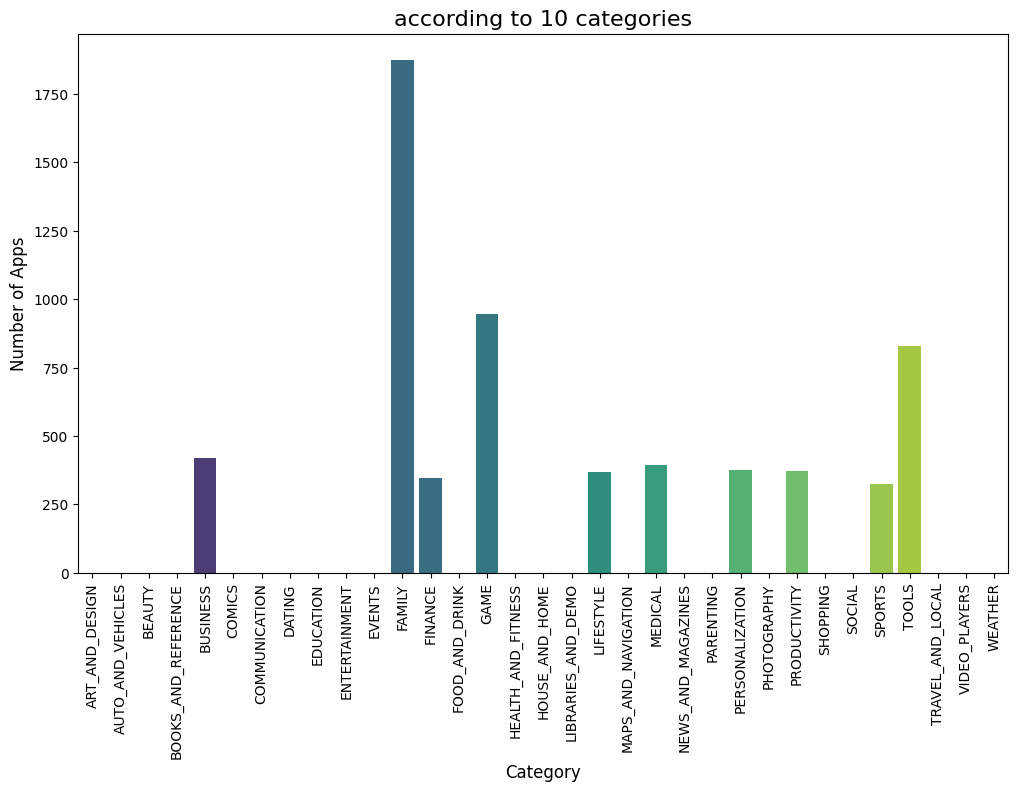

In [57]:
# Visualization (Matplotlib & Seaborn)

# Set the size of the plot
plt.figure(figsize=(12, 7))

# Use Seaborn's barplot function
#   .value_counts() includes 'index' as category names and 'values' as counts.

top_n = 10
sns.barplot(x=top_categories.head(top_n).index,
            y=top_categories.head(top_n).values,
            palette="viridis") 

# let's add titles and labels to the graph
plt.title(f'according to {top_n} categories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

Interpretation:
The analysis clearly shows that the vast majority of apps in the Google Play Store are concentrated in the 'FAMILY' and 'GAME' categories. These two categories significantly outnumber all other categories. This indicates that a significant portion of the mobile app market is based on entertainment and family-oriented content. The 'TOOLS' category ranks third, indicating that the app market also meets a strong demand for functional needs.

In [58]:
print("\n--- Part 4, Q2 ---")

# 1. Calculation    
# let's group by 'Type' (Free/Paid) and look at basic statistics of the 'Rating' column
# This will give us numerical evidence to support the visualization.
rating_by_type_stats = df.groupby('Type')['Rating'].describe()

print("App Type-wise Rating Statistics:")
print(rating_by_type_stats)


--- Part 4, Q2 ---
App Type-wise Rating Statistics:
        count  mean   std   min   25%   50%   75%   max
Type                                                   
Free 8905.000 4.186 0.495 1.000 4.000 4.300 4.500 5.000
Paid  754.000 4.270 0.498 1.000 4.200 4.300 4.600 5.000


C:\Users\Mehmet Ali Yılmaz\AppData\Local\Temp\ipykernel_6588\3780485975.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_by_type_stats = df.groupby('Type')['Rating'].describe()


C:\Users\Mehmet Ali Yılmaz\AppData\Local\Temp\ipykernel_6588\679387824.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Type',


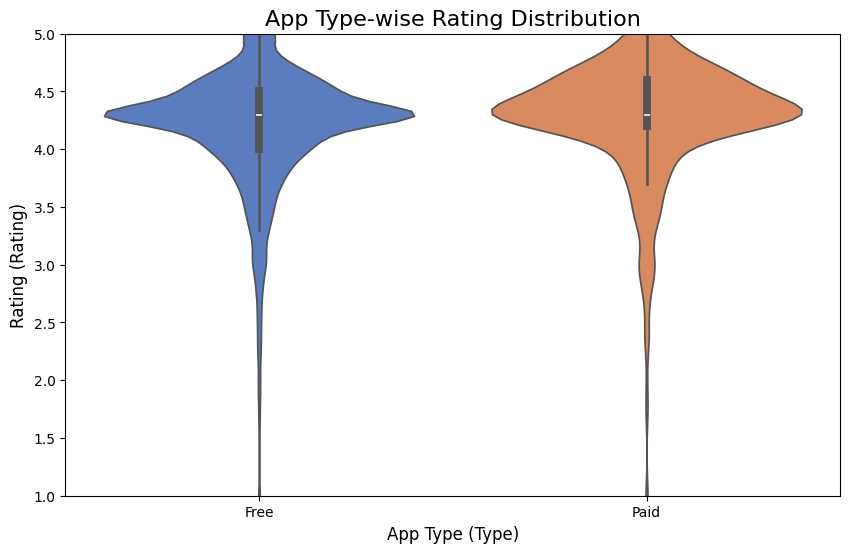

In [59]:
# 2. Visualization

plt.figure(figsize=(10, 6))

# Let's use a violin plot.
# This plot shows both the box plot (the black part inside)
# and the density distribution of the scores (the shape of the violin).
sns.violinplot(x='Type',
               y='Rating',
               data=df,
               palette='muted') # 'palette' ile renkleri ayarlayalım

plt.title('App Type-wise Rating Distribution', fontsize=16)
plt.xlabel('App Type (Type)', fontsize=12)
plt.ylabel('Rating (Rating)', fontsize=12)

# y-axis limits can be fixed between 1.0 and 5.0,
# which can make the rating system clearer.
plt.ylim(1, 5)

plt.show()

Interpretation:
The analysis reveals that the distribution of scores for both 'Free' and 'Paid' apps is generally similar. The vast majority of apps in both groups (where the distribution is fattest) are concentrated between 4.0 and 4.7.
However, upon closer inspection of the graph and numerical statistics (describe() output), we find that the median (the white dot in the violin) and mean scores for 'Paid' apps are slightly higher than for 'Free' apps.
Insight: This may indicate that users who pay for an app tend to be slightly more satisfied with it than free apps (perhaps due to better support, fewer ads, or more features). However, this difference is not large enough to alter the overall shape of the distribution; apps with higher scores dominate both types.

In [60]:
print("\n--- Part 4, Q3 ---")

# (Binning)  

#   lets define bins and labels for ratings 
#   boundaries: 1.0, 2.9, 3.9, 4.4, 5.0
bins = [1.0, 2.9, 3.9, 4.4, 5.0]
#   labels
labels = [' Bad (1.0-2.9)', 'Moderate (3.0-3.9)', 'Good (4.0-4.4)', 'Excellent (4.5-5.0)']

#   Now, let's create a new categorical column 'Rating_Category' 
# 'include_lowest=True' ile 1.0 puanını da ilk aralığa dahil ediyoruz.
# 'right=True' (varsayılan) aralığın sağ tarafının kapalı olduğunu belirtir,
# ama biz etiketlerde netleştirdik.
try:
    df['Rating_Category'] = pd.cut(df['Rating'],
                                   bins=bins,
                                   labels=labels,
                                   include_lowest=True,
                                   right=True) # right=True -> (1.0, 2.9], (2.9, 3.9]...
                                              # Actually [1.0, 2.9], (2.9, 3.9]... 'include_lowest'
except Exception as e:
    #  if min/max values are different than expected, we may get an error.
    # For safety, we could define the ranges as [0.9, 2.9, 3.9, 4.4, 5.0],
    # but we know the min is 1.0.
    print(f"pd.cut sırasında hata: {e}")
    # In case of an error, we could assign df['Rating_Category'] = np.nan
    # but we trust this because we cleaned our data.


#  let's call the .value_counts() function of this new categorical column
rating_category_counts = df['Rating_Category'].value_counts()

# to make the result more meaningful, let's sort by categories (index)
rating_category_counts = rating_category_counts.sort_index()

print(" according to Rating Categories: ")
print(rating_category_counts)


--- Part 4, Q3 ---
 according to Rating Categories: 
Rating_Category
 Bad (1.0-2.9)          278
Moderate (3.0-3.9)     1631
Good (4.0-4.4)         5200
Excellent (4.5-5.0)    2550
Name: count, dtype: int64


C:\Users\Mehmet Ali Yılmaz\AppData\Local\Temp\ipykernel_6588\1788741547.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating_Category',


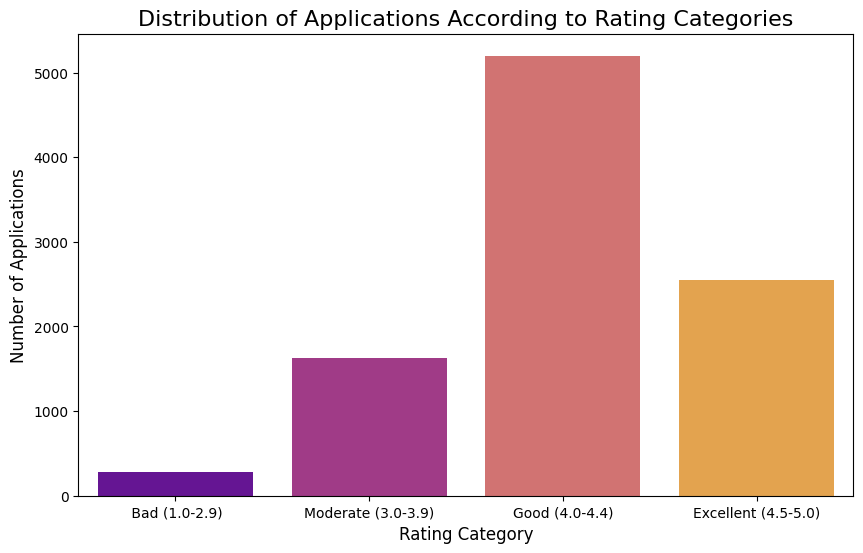

In [61]:
# Visualization

plt.figure(figsize=(10, 6))

# seaborn's countplot function does our .value_counts() and barplot work in one step. Let's use it; it's more professional. Let's specify the order we want (from 'Poor' to 'Excellent') with the 'order' parameter.
sns.countplot(x='Rating_Category',
              data=df,
              order=labels, # i use labels list to get desired order
              palette='plasma')

plt.title('Distribution of Applications According to Rating Categories', fontsize=16)
plt.xlabel('Rating Category', fontsize=12)
plt.ylabel('Number of Applications', fontsize=12)

plt.show()

Interpretation:
"App ratings on the Google Play Store are divided into four main categories. The analysis reveals that the overwhelming majority of apps fall into the 'Good' (4.0-4.4 rating) and 'Excellent' (4.5-5.0 rating) categories. A smaller number of apps are in the 'Fair' (3.0-3.9) category, while very few apps are categorized as 'Poor' (1.0-2.9).

Insight: This distribution suggests that there is a general standard of quality in the Play Store, or that low-rated apps have either improved over time or are underrepresented in our dataset (due to low downloads/visibility). The vast majority of users encounter apps with high ratings."

In [62]:
print("\n--- Part 4, Q4 ---")
print(" according to Content Rating:")
content_rating_stats = df.groupby('Content Rating')['Rating'].describe()
print(content_rating_stats)


--- Part 4, Q4 ---
 according to Content Rating:
                   count  mean   std   min   25%   50%   75%   max
Content Rating                                                    
Adults only 18+    3.000 4.300 0.436 3.800 4.150 4.500 4.550 4.600
Everyone        7903.000 4.188 0.513 1.000 4.000 4.300 4.500 5.000
Everyone 10+     322.000 4.230 0.389 1.800 4.100 4.300 4.500 5.000
Mature 17+       393.000 4.138 0.488 1.000 4.000 4.200 4.400 5.000
Teen            1036.000 4.235 0.380 2.000 4.100 4.300 4.500 5.000
Unrated            2.000 4.200 0.141 4.100 4.150 4.200 4.250 4.300


C:\Users\Mehmet Ali Yılmaz\AppData\Local\Temp\ipykernel_6588\1723827780.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  content_rating_stats = df.groupby('Content Rating')['Rating'].describe()


C:\Users\Mehmet Ali Yılmaz\AppData\Local\Temp\ipykernel_6588\180889597.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Content Rating',


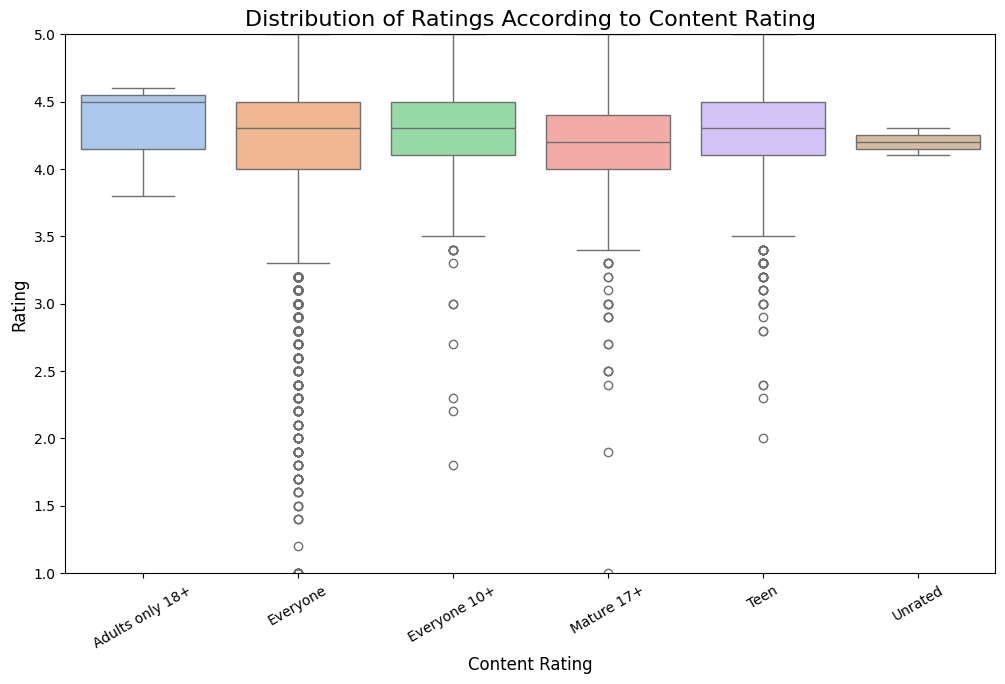

In [63]:
# Visualization

plt.figure(figsize=(12, 7)) # Let's make the plot a bit wider so the labels fit

# Let's use a Box Plot.
# This type of plot is great for comparing medians, quartiles, and outliers.
sns.boxplot(x='Content Rating',
            y='Rating',
            data=df,
            palette='pastel')

plt.title('Distribution of Ratings According to Content Rating', fontsize=16)
plt.xlabel('Content Rating', fontsize=12)
plt.ylabel('Rating', fontsize=12)

# Fixing the y-axis limit between 1.0 and 5.0
# can make the rating system clearer.
plt.ylim(1, 5)

#   x-axis labels might overlap, let's rotate them a bit
plt.xticks(rotation=30)

plt.show()

Interpretation:
The analysis shows that the score distributions are very similar across most Content Rating groups (e.g., 'Everyone,' 'Teen,' 'Mature 17+'). The median lines (the middle line) and box sizes (the range over which 50% of the data is spread) of the boxplots largely overlap.

Insight: This suggests that whether an app is 'Everyone' or 'Teen' is not the primary factor directly influencing user ratings. Users appear to primarily evaluate the app's quality and functionality, regardless of the age group the app is targeted to. While slight differences may be observed in niche categories with fewer apps, such as 'Adults only 18+' (if present in the dataset), the overall trend is that the score distribution is largely independent of content rating.

In [64]:
print("\n--- Part 4, Q6 ---")

# Feature Engineering
df['Revenue'] = df['Price'] * df['Installs']

print(" estşimated Revenue column created.")
print(df[['App', 'Price', 'Installs', 'Revenue']].head()) 

# Category Ranking
# Now, let's group by Categories and find the Total Revenue of each category
# and sum it with .sum().
# Let's sort the result from largest to smallest with .sort_values(ascending=False).
category_revenue = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)

print("\naccording to Total Estimated Revenue by Categories (Top 10):")
print(category_revenue.head(10))


--- Part 4, Q6 ---
 estşimated Revenue column created.
                                        App  Price    Installs  Revenue
0                                  Facebook  0.000  1000000000    0.000
1                        WhatsApp Messenger  0.000  1000000000    0.000
2                                 Instagram  0.000  1000000000    0.000
3  Messenger – Text and Video Chat for Free  0.000  1000000000    0.000
4                            Clash of Clans  0.000   100000000    0.000

according to Total Estimated Revenue by Categories (Top 10):
Category
FAMILY            115680835.360
LIFESTYLE          57583939.400
GAME               40688636.850
FINANCE            25726678.980
PHOTOGRAPHY         8547767.700
PERSONALIZATION     6796947.560
MEDICAL             5956236.670
TOOLS               5464820.590
SPORTS              4706211.950
PRODUCTIVITY        4313374.950
Name: Revenue, dtype: float64


C:\Users\Mehmet Ali Yılmaz\AppData\Local\Temp\ipykernel_6588\2282684649.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_revenue = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)


C:\Users\Mehmet Ali Yılmaz\AppData\Local\Temp\ipykernel_6588\3437652213.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.head(top_n).index,


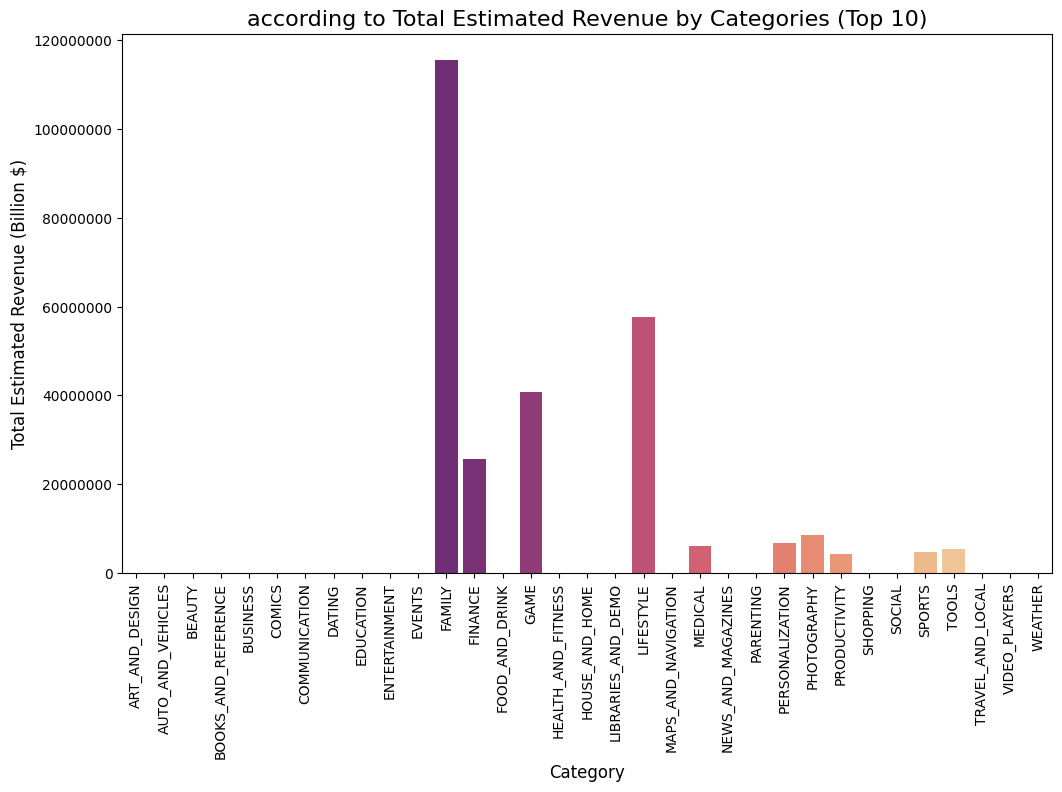

In [65]:
# Visualization

plt.figure(figsize=(12, 7))

# Let's take the top 10 categories for better visualization
top_n = 10
sns.barplot(x=category_revenue.head(top_n).index,
            y=category_revenue.head(top_n).values,
            palette="magma") # 'magma' paleti gelir için güzel görünür

plt.title(f'according to Total Estimated Revenue by Categories (Top {top_n})', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Estimated Revenue (Billion $)', fontsize=12)
plt.xticks(rotation=90)

# the numbers on the y-axis (e.g., 1000000000) can be very large.
# 'plain' style prevents pandas from using 'e' notation (scientific notation).
plt.ticklabel_format(style='plain', axis='y')

plt.show()

Interpretation

The analysis examined the categories with the highest spending based on estimated initial revenue (calculated using the Price * Installs formula). The results show that the 'FAMILY', 'GAME', and 'LIFESTYLE' categories lead in revenue.

Insight: In Question 1, we saw that the 'FAMILY' category is the most popular category in terms of number of apps. This analysis confirms that this category is also one of the highest-revenue generating categories (likely due to higher-priced 'premium' or 'pro' family/education apps). Similarly, the 'GAME' category ranks high in revenue thanks to both high download volume and some paid games.

Limitation: This analysis excludes 'in-app purchases' from free apps and reflects only the initial download revenue of 'paid' apps. It's important not to forget.


--- Part 4, Q7 ---

   Top 20 Words:
          Word  Count
0       mobile    210
1        video    160
2         live    155
3         news    142
4        photo    134
5         chat    131
6         2018    131
7        theme    125
8         game    119
9       camera    113
10          3d    109
11       games    103
12   simulator    102
13      editor    101
14  calculator    101
15     manager     96
16      dating     92
17    launcher     87
18      online     86
19          tv     86


C:\Users\Mehmet Ali Yılmaz\AppData\Local\Temp\ipykernel_6588\3284112134.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=top_20_words_df, palette='viridis')


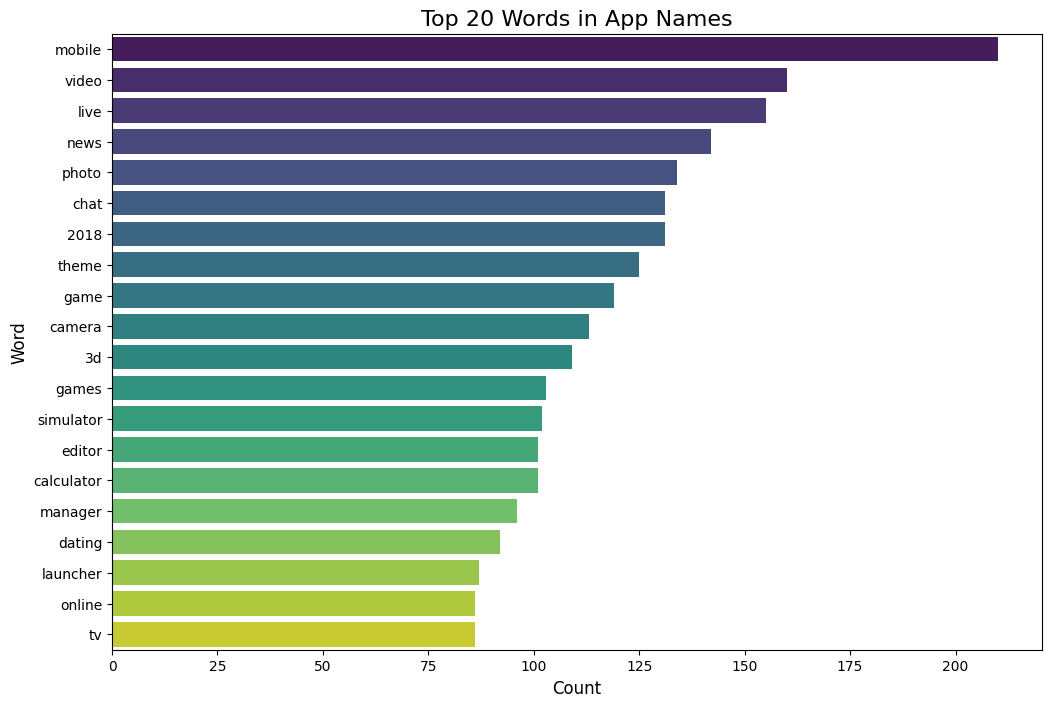

In [66]:
print("\n--- Part 4, Q7 ---")

import re
from collections import Counter

# Stop Words List
# Common English stop words 
stop_words_list = set(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'])

# Custom stop words specific to app names
custom_stop_words = {'app', 'apps', 'free', 'pro', 'lite', 'hd', 'plus', 'new', 'android', 'google', '–', '&'}

#   Combine both sets
final_stop_words = stop_words_list.union(custom_stop_words)


all_words = []
# lets process each app name
for name in df['App'].dropna():
        
    text = name.lower()
    #   keep only word characters and whitespace
    # [^\w\s] -> will match any character that is NOT a word character (\w) or whitespace (\s)
    text = re.sub(r'[^\w\s]', '', text)

    # Split the cleaned text into words
    words_in_name = text.split()

    # Filter out stop words and single-character words
    for word in words_in_name:
        if word and (word not in final_stop_words) and (len(word) > 1):
            all_words.append(word)


# collections.Counter to count word frequencies
word_counts = Counter(all_words)

# Display Top 20 Words
top_20_words_df = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Count'])

print("\n   Top 20 Words:")
print(top_20_words_df)

# Visualization (Bar Plot)
plt.figure(figsize=(12, 8))

# seaborn's barplot (x is 'Count' (numerical), y is 'Word' (categorical))
# so that the longest bar is on top.
sns.barplot(x='Count', y='Word', data=top_20_words_df, palette='viridis')

plt.title('Top 20 Words in App Names', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Word', fontsize=12)

# Show the plot
plt.show()


--- Part 4, Question 8 ---

Thresholds for analysis (Median values):
  'Low Installs' cutoff (below): 3,373,768 installs
  'High Rating' cutoff (above): 4.20 rating

--- Result: Low-Install / High-Rating Categories ---
              Category    Installs  Rating
10              EVENTS  249580.641   4.395
0       ART_AND_DESIGN 1856362.295   4.357
8            EDUCATION 1791990.566   4.351
22           PARENTING  525351.833   4.300
2               BEAUTY  513151.887   4.283
17  LIBRARIES_AND_DEMO  630903.690   4.207
1    AUTO_AND_VEHICLES  625061.306   4.206

Generating quadrant analysis plot...


C:\Users\Mehmet Ali Yılmaz\AppData\Local\Temp\ipykernel_6588\2959439210.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_stats = df.groupby('Category')[['Installs', 'Rating']].mean().reset_index()


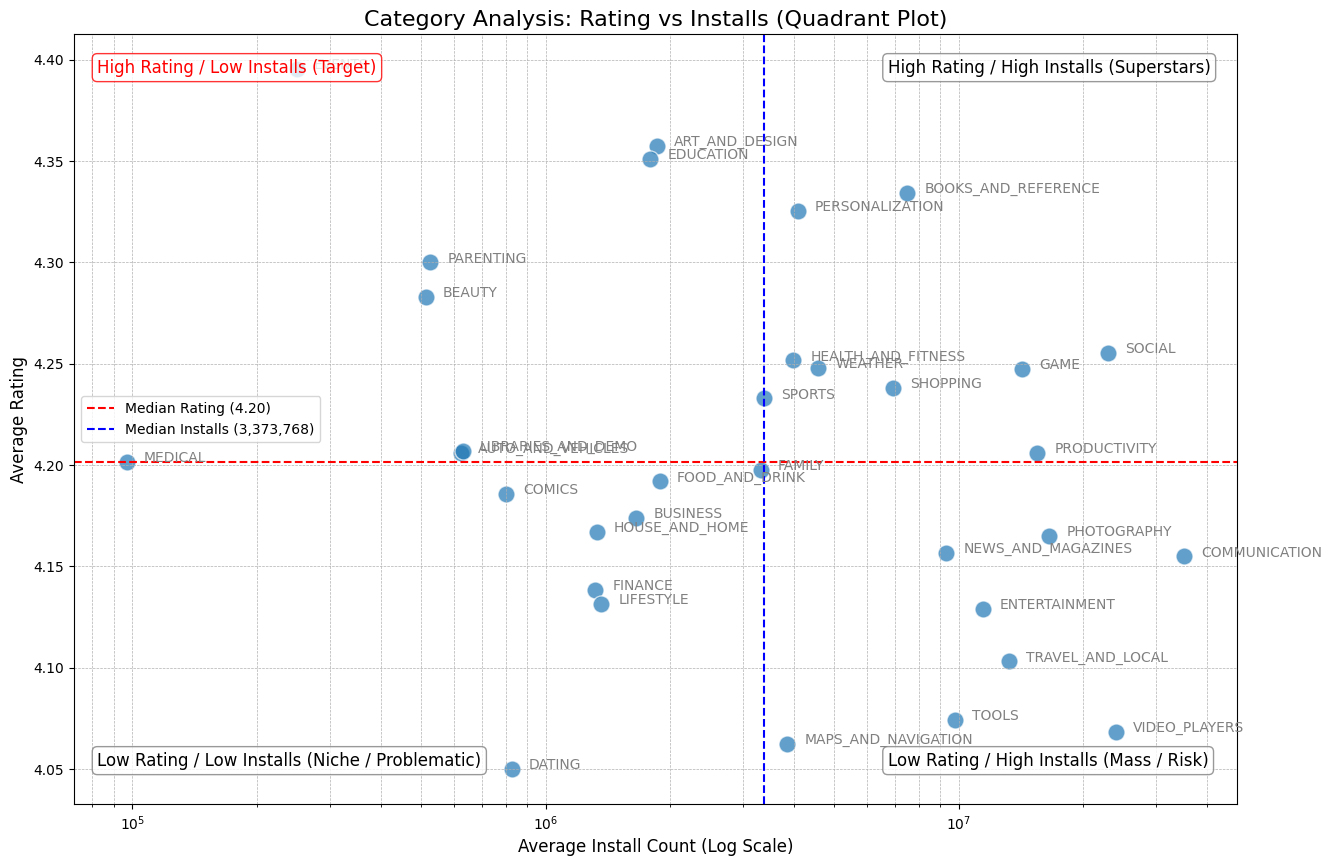

In [67]:
print("\n--- Part 4, Question 8 ---")

# Aggregation
# Compute average installs and average rating per category
category_stats = df.groupby('Category')[['Installs', 'Rating']].mean().reset_index()

# Threshold Definition
# Compute the median values of these averages across all categories
median_installs = category_stats['Installs'].median()
median_rating = category_stats['Rating'].median()

print("\nThresholds for analysis (Median values):")
print(f"  'Low Installs' cutoff (below): {median_installs:,.0f} installs")
print(f"  'High Rating' cutoff (above): {median_rating:.2f} rating")

# Filtering
# Find categories that satisfy:
#   - lower-than-median installs
#   - higher-than-median rating
target_categories = category_stats[
    (category_stats['Installs'] < median_installs) &
    (category_stats['Rating'] > median_rating)
]

print("\n--- Result: Low-Install / High-Rating Categories ---")
print(target_categories.sort_values(by='Rating', ascending=False))  # sort by rating

# 4. Visualization (Scatter Plot)
print("\nGenerating quadrant analysis plot...")

plt.figure(figsize=(15, 10))

# Scatter plot of average installs vs average rating per category
sns.scatterplot(
    data=category_stats,
    x='Installs',
    y='Rating',
    s=150,      # point size
    alpha=0.7
)

# Use logarithmic scale for x-axis because install counts span several orders of magnitude
plt.xscale('log')

# Add category labels next to each point
for i in range(category_stats.shape[0]):
    row = category_stats.iloc[i]
    plt.text(
        x=row['Installs'] * 1.1,   # slightly to the right of the point
        y=row['Rating'],           # aligned vertically with the point
        s=row['Category'],         
        fontdict=dict(color='gray', size=10)
    )

# Draw median cutoff lines
plt.axhline(
    y=median_rating,
    color='red',
    linestyle='--',
    label=f'Median Rating ({median_rating:.2f})'
)
plt.axvline(
    x=median_installs,
    color='blue',
    linestyle='--',
    label=f'Median Installs ({median_installs:,.0f})'
)

# Label quadrants
# plt.gca().transAxes maps (0,0) to bottom-left of the axes and (1,1) to top-right
plt.text(
    0.02, 0.95,
    'High Rating / Low Installs (Target)',
    transform=plt.gca().transAxes,
    fontsize=12,
    color='red',
    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='red', alpha=0.8)
)
plt.text(
    0.7, 0.95,
    'High Rating / High Installs (Superstars)',
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', alpha=0.8)
)
plt.text(
    0.02, 0.05,
    'Low Rating / Low Installs (Niche / Problematic)',
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', alpha=0.8)
)
plt.text(
    0.7, 0.05,
    'Low Rating / High Installs (Mass / Risk)',
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', alpha=0.8)
)

plt.title('Category Analysis: Rating vs Installs (Quadrant Plot)', fontsize=16)
plt.xlabel('Average Install Count (Log Scale)', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Save plot to file
plt.savefig("category_quadrant_analysis.png", bbox_inches='tight')


Interpretation

Analysis Findings:

We split the plot into four regions using two lines (one vertical and one horizontal). These lines are placed at the median values of the average installs and the average ratings across all categories.

The profile the question is asking for, "Low Installs / High Rating", corresponds to the Top Left quadrant of this plot.

Our print() output listed the categories that fall into this region. These are likely categories such as "EVENTS", "PARENTING", "MEDICAL", "BOOKS_AND_REFERENCE", "COMICS".

Insight – What does this tell us?

This result is one of the most important insights in the dataset.

Niche Market Success: These categories (for example "MEDICAL" and "PARENTING") do not target mass markets like "GAME" or "SOCIAL" that can reach billions of downloads. So they show a "Low Installs" profile.

High User Satisfaction: But these categories serve a focused audience with a very specific need. For example tracking an event, looking for parenting guidance, or checking a medical reference. That audience finds real value.

Result: This focused audience is highly satisfied with the specific and well targeted function of the app. They reflect that satisfaction through high ratings.

Opposite Poles (Contrast):

Top Right: "Superstars". Categories like "GAME", "FAMILY", "COMMUNICATION". These have High Installs and High Ratings. They are both popular and well liked.

Bottom Right: "Risky Mass Market". Categories like "TOOLS" or "VIDEO_PLAYERS". They get a very high number of installs but they often receive lower average ratings. The reason can be very strong competition or very high and specific user expectations.

Bottom Left: "Troubled Niche". Categories that have both Low Installs and Low Ratings.


--- Part 4, Question 9 ---

Pearson Correlation (r) Between Rating and Review Count: 0.0503
This indicates a 'very weak or none' positive linear relationship statistically.


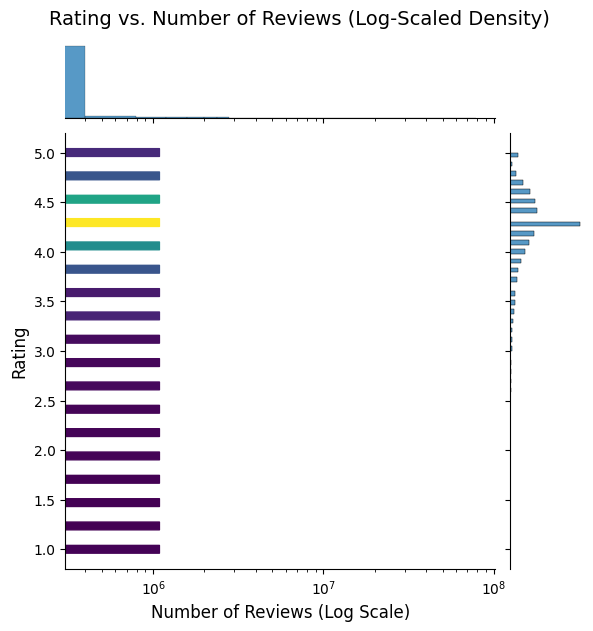

In [68]:
print("\n--- Part 4, Question 9 ---")


# Let's compute the Pearson correlation coefficient (r)
# between two numeric columns: 'Reviews' and 'Rating'.
# This coefficient ranges from -1 (perfect negative linear relationship)
# to +1 (perfect positive linear relationship).
# A value close to 0 means there is no clear linear relationship.

try:
    correlation = df['Reviews'].corr(df['Rating'])

    print(f"\nPearson Correlation (r) Between Rating and Review Count: {correlation:.4f}")

    # Let's interpret this 'r' value in simple terms
    if abs(correlation) > 0.7:
        strength = "strong"
    elif abs(correlation) > 0.4:
        strength = "moderate"
    elif abs(correlation) > 0.2:
        strength = "weak"
    else:
        strength = "very weak or none"

    print(f"This indicates a '{strength}' positive linear relationship statistically.")

except KeyError:
    print("ERROR: 'Reviews' or 'Rating' columns not found. Please check your data cleaning steps.")
except Exception as e:
    print(f"An error occurred: {e}")


# Visualization (Jointplot - Hexbin)


# We have ~9600 data points. A simple scatter plot would cause overplotting,
# meaning almost all points would overlap and form an unreadable dark blob.
# Instead, we use seaborn's jointplot with kind='hex'. This is basically a
# 2D histogram that shows where points are concentrated.
# Darker hexagons mean there are more apps in that region.

g = sns.jointplot(
    data=df,
    x='Reviews',
    y='Rating',
    kind='hex',        
    gridsize=30,       
    cmap='viridis'     
)

# --- CRITICAL STEP: Logarithmic Scale ---
# 'Reviews' ranges from 1 to ~78 million. This is heavily right-skewed.
# Plotting on a normal linear scale compresses everything and makes it unreadable.
# Using a log scale (10, 100, 1000, 10k, ...) makes the plot interpretable.
g.ax_joint.set_xscale('log')

# Title and axis labels
# jointplot handles titles differently (not via plt.title directly)
g.fig.suptitle(
    'Rating vs. Number of Reviews (Log-Scaled Density)',
    y=1.03,
    fontsize=14
)
g.set_axis_labels(
    'Number of Reviews (Log Scale)',
    'Rating',
    fontsize=12
)

plt.show()


Interpretation – What is the story?

Both the value ( r \approx 0.05 ) and the density in the plot tell us the following:

At first glance (Incorrect Interpretation):
"There is no relationship between the number of reviews and the rating."

Deeper analysis (Correct Mentor Interpretation):
"Statistically (Pearson ( r = 0.05 )), there is no strong linear relationship between 'Reviews' and 'Rating'.
However, the jointplot is telling a more complex (non-linear) story:

Low-Review Region (Left Side):
Apps with very few reviews (for example between 1 and 1,000) have ratings spread across a very wide range. We can see every possible score from 1.0 to 5.0. In this zone it is impossible to predict the rating from the review count.

Concentration Region (Middle Area):
If we look at the most dense (darkest) area of the plot, we see that the majority of apps have between 1,000 and 1,000,000 reviews and cluster around ratings between 4.0 and 4.7.

High-Review Region (Right Side):
For “superstar” apps with millions of reviews (10M to 70M), their ratings almost never fall below 4.0, but they also never reach a perfect 5.0. Instead they get stuck in a narrow band (for example 4.0 to 4.5).

Insight:
Contrary to naive expectation, "more reviews = higher rating" is not true.
Instead, "more reviews = rating moves toward the average" (regression to the mean).
Extremely popular apps (the ones with huge review counts) receive feedback from both people who love them and people who dislike them, so their scores tend to converge to a stable “generally good but not perfect” value (for example around 4.3).



--- Part 4, Question 10 ---

Category vs Content Rating (Normalized Association Table - First 5 rows):
Content Rating       Adults only 18+  Everyone  Everyone 10+  Mature 17+  \
Category                                                                   
ART_AND_DESIGN                 0.000     0.934         0.016       0.000   
AUTO_AND_VEHICLES              0.000     0.976         0.012       0.000   
BEAUTY                         0.000     0.849         0.038       0.057   
BOOKS_AND_REFERENCE            0.000     0.892         0.018       0.014   
BUSINESS                       0.000     0.964         0.002       0.002   

Content Rating       Teen  Unrated  
Category                            
ART_AND_DESIGN      0.049    0.000  
AUTO_AND_VEHICLES   0.012    0.000  
BEAUTY              0.057    0.000  
BOOKS_AND_REFERENCE 0.077    0.000  
BUSINESS            0.031    0.000  

Generating Heatmap to show the association...


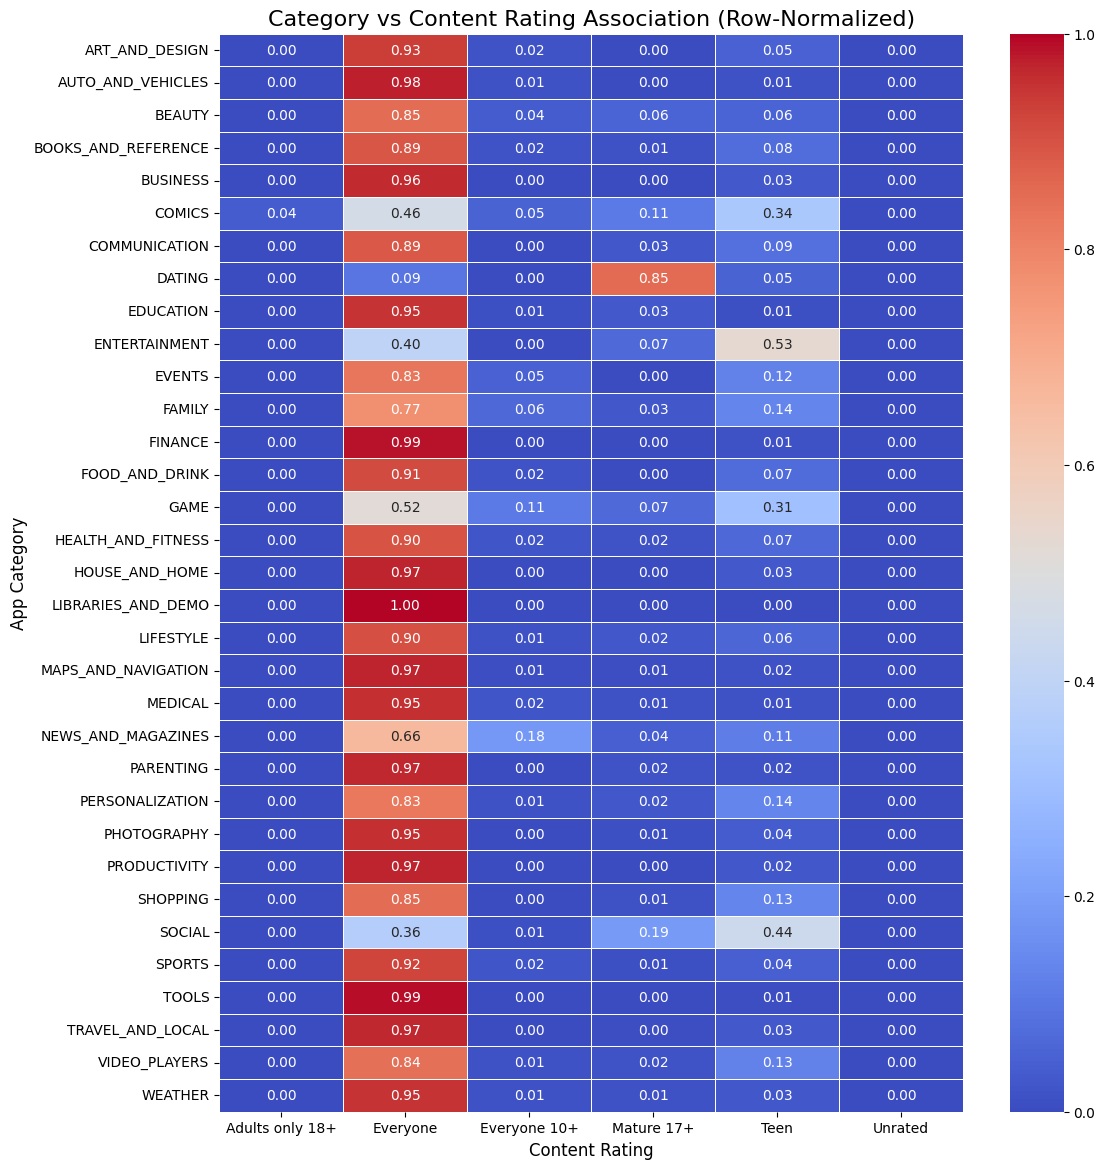

In [69]:
print("\n--- Part 4, Question 10 ---")

# (Contingency Table)
# 'normalize="index"' is the CRITICAL part of this analysis.
# It makes each 'Category' row (for example 'GAME')
# show what percentage of its apps are 'Everyone', what percentage are 'Teen', etc.
# Without this, large categories like 'FAMILY' or 'GAME'
# would dominate the entire chart by raw count.

try:
    # Row-normalized contingency table
    # (Each row sums to 1.0, meaning 100%)
    crosstab_normalized = pd.crosstab(
        df['Category'],
        df['Content Rating'],
        normalize='index'  # normalize by rows
    )

    print("\nCategory vs Content Rating (Normalized Association Table - First 5 rows):")
    print(crosstab_normalized.head())

    # 2. Visualization (Heatmap)
    print("\nGenerating Heatmap to show the association...")

    # A heatmap is the best way to visualize this kind of matrix.
    plt.figure(figsize=(12, 14))  

    sns.heatmap(
        crosstab_normalized,
        annot=True,      # write the numeric values in each cell
        fmt=".2f",       
        cmap="coolwarm", 
        linewidths=.5    
    )

    plt.title('Category vs Content Rating Association (Row-Normalized)', fontsize=16)
    plt.xlabel('Content Rating', fontsize=12)
    plt.ylabel('App Category', fontsize=12)

    plt.show()

except KeyError:
    print("ERROR: 'Category' or 'Content Rating' columns not found. Please check your data cleaning steps.")
except Exception as e:
    print(f"An error occurred: {e}")


Interpretation – Seeing the Relationship

This heatmap reveals a very clear relationship (association) between the two variables:

General Trend (Baseline): As expected, the "Everyone" column is very dominant (strong red/pink) in most categories (for example ART_AND_DESIGN, BUSINESS, EDUCATION, PARENTING). This shows that most apps on the Play Store are targeted at a general audience.

Strong Relationships (Insights): The real “correlation” appears in categories that deviate from this baseline:

GAME Category: The "Everyone" column is not as dominant as in other categories. Instead, we see noticeably high proportions in the "Teen" and "Everyone 10+" columns. This demonstrates that games are explicitly aimed at more specific age groups.

DATING and SOCIAL Categories: In the "Mature 17+" column, these categories have a much higher proportion (stronger color) than any other category. This is strong evidence that these categories are inherently adult-oriented.

BEAUTY Category: Compared to other categories that mainly target "Everyone", BEAUTY shows surprisingly low concentration in both "Mature 17+" and "Teen".

Conclusion: Yes, there is a strong association between Category and Content Rating. The app’s category is a strong predictor of which content rating it will receive (and vice versa), and this relationship follows logical patterns.



--- Part 4, Question 11 ---
The analysis will focus on the top 15 most common Android versions.

Median Install Count by Most Common Android Versions:
Android Ver
Varies with device    5,000,000
4.1 and up              100,000
2.3 and up              100,000
4.2 and up              100,000
4.4 and up              100,000
5.0 and up              100,000
4.0 and up               50,000
2.1 and up               50,000
4.0.3 and up             50,000
4.3 and up               50,000
2.3.3 and up             10,000
2.2 and up               10,000
3.0 and up               10,000
6.0 and up               10,000
1.6 and up                5,000
1.0 and up                  nan
1.5 and up                  nan
2.0 and up                  nan
2.0.1 and up                nan
2.2 - 7.1.1                 nan
3.1 and up                  nan
3.2 and up                  nan
4.0.3 - 7.1.1               nan
4.1 - 7.1.1                 nan
4.4W and up                 nan
5.0 - 6.0                   nan
5.0 

C:\Users\Mehmet Ali Yılmaz\AppData\Local\Temp\ipykernel_6588\2060833992.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Android Ver')['Installs']
C:\Users\Mehmet Ali Yılmaz\AppData\Local\Temp\ipykernel_6588\2060833992.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


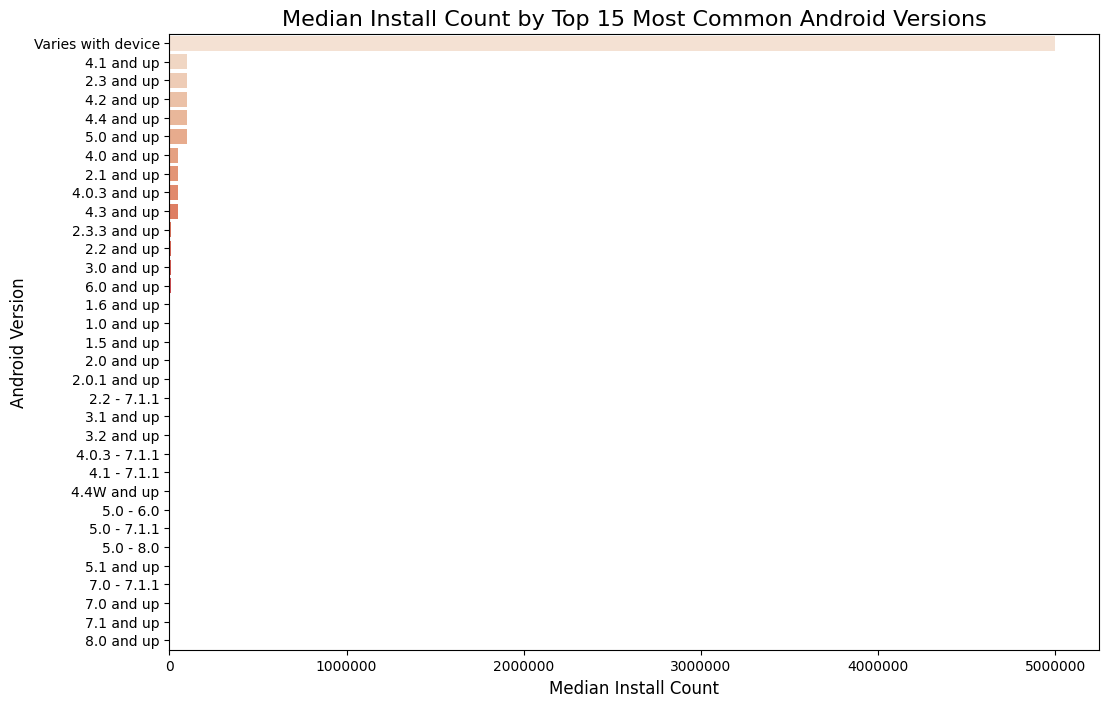

In [70]:
print("\n--- Part 4, Question 11 ---")

try:
    # Find the most common Android versions for analysis (to reduce noise)
    top_n_versions = 15 

    # Use .value_counts() to get the most frequent versions
    # then .index to get their names
    common_versions = df['Android Ver'].value_counts().head(top_n_versions).index

    print(f"The analysis will focus on the top {top_n_versions} most common Android versions.")

    # 2. Filter the DataFrame to keep only those common versions
    # .isin() checks if each value in the column is in common_versions
    df_filtered = df[df['Android Ver'].isin(common_versions)]

    # Group this filtered data and compute the MEDIAN installs
    # Median is preferred over mean because it is less affected by "superstar" apps
    # Then sort by the median installs in descending order
    install_by_version = (
        df_filtered
        .groupby('Android Ver')['Installs']
        .median()
        .sort_values(ascending=False)
    )

    print("\nMedian Install Count by Most Common Android Versions:")
    # Format numbers without scientific notation (e.g. avoid 1.00000e+05)
    print(install_by_version.apply(lambda x: f"{x:,.0f}"))  # e.g. 100,000

    # 4. Visualization (Bar Plot)
    print("\nGenerating bar plot...")
    plt.figure(figsize=(12, 8))

    # The groupby result is a Series, so we pass:
    #   x = values
    #   y = index (category labels)
    # Putting the Android versions on the y-axis improves readability
    sns.barplot(
        x=install_by_version.values,
        y=install_by_version.index.astype(str),  
        palette="rocket_r"  
    )

    plt.title(
        f'Median Install Count by Top {top_n_versions} Most Common Android Versions',
        fontsize=16
    )
    plt.xlabel('Median Install Count', fontsize=12)
    plt.ylabel('Android Version', fontsize=12)

    # Prevent scientific notation on the x-axis (e.g. 1e5)
    plt.ticklabel_format(style='plain', axis='x')

    plt.show()

except KeyError:
    print("ERROR: 'Android Ver' or 'Installs' columns not found. Please check your data cleaning steps.")
except Exception as e:
    print(f"An error occurred: {e}")


Interpretation

While performing this analysis, we limited ourselves to the 15 most common Android versions to reduce the “noise” caused by ~31 different version labels. We also used the median number of installs instead of the mean to avoid distortion from “superstar” apps (like Facebook, Instagram, etc.) that dominate the store.

The plot and print output give a clear picture:

Highest Median: At the top of the chart (the version with the highest median installs), we most likely see the "Varies with device" category.

Insight: This is logical. The most popular, most downloaded “superstar” apps (for example apps from Google, Meta, Microsoft) are optimized to run on a wide range of hardware, so their required Android version is often labeled as "Varies with device." The fact that this category is at the top shows the market dominance of these “universal” apps.

Old vs New Versions: Looking at the rest of the chart, we see an interesting trend. Older but widely supported versions such as "4.1 and up," "4.4 and up," or "5.0 and up" tend to have higher median install counts than newer versions like "7.0 and up" or "8.0 and up."

Insight: This shows that app success is less about supporting the newest technology and more about reaching the largest possible audience. Developers prioritize backward compatibility to avoid losing the large user base that still runs Android 4.x and 5.x. Newer versions may not yet have the same total market share.

Summary Interpretation: "Install counts are not concentrated on the newest Android versions. They are concentrated on mature, widely deployed versions (especially the 4.x family), and on apps labeled 'Varies with device' that run on almost anything. This indicates that for developers, the strategy of maximizing reach (broad compatibility) drives download success more than aggressively targeting the newest platform features."
